In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

<h1> Data Ingestion </h1>

Downloading the Data from UCI

In [3]:
!curl -s -o diabetes.zip "https://archive.ics.uci.edu/static/public/296/diabetes+130-us+hospitals+for+years+1999-2008.zip"

Extract the required file from the zip folder

In [5]:
with zipfile.ZipFile("diabetes.zip", 'r') as zip_ref:
    zip_ref.extractall()

<h1> Data Exploration </h1>

In [6]:
raw_data = pd.read_csv("diabetic_data.csv")

In [7]:
raw_data.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
print(
    f"Dimensions of the data: {raw_data.shape[0]} rows and {raw_data.shape[1]} columns")

Dimensions of the data: 101766 rows and 50 columns


It is observed that a few of the columns have the value "?". We need to replace them with na and then check for null values

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

From the above, we observe that:
1. There are no missing values since they are encoded as "?" as stated above
2. The data types are either object or int64

In [10]:
raw_data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<h1> Data Cleaning and Preprocessing </h1>

In [11]:
# Replacing the "?" with na's
raw_data.replace("?", np.NaN, inplace=True)

Checking for nulls again

In [12]:
raw_data.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

As we can see a few of the features like race, weight, payer_code, medical_speciality, diag_1, diag_2 and diag_3 have nulls 

We can remove weight and payer_code since they aren't relevant to the outcome and they have too many nulls|

In [13]:
raw_data.drop(['weight', 'payer_code'], axis=1, inplace=True)

In [14]:
raw_data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

<h2>Reading the IDS mapping document</h2>

In [15]:
ids_admit_type_id_mapping = pd.read_csv("IDS_mapping.csv", nrows=8) 

In [16]:
ids_admit_type_id_mapping

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [17]:
raw_data.shape

(101766, 48)

In [18]:
data_df = pd.merge(raw_data, ids_admit_type_id_mapping, how='left', on='admission_type_id')

In [19]:
data_df.shape

(101766, 49)

In [20]:
data_df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [21]:
data_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency


<h1> Feature Engineering </h1>

C:\Users\tgt55\AppData\Local\Temp\ipykernel_29052\2758106875.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')


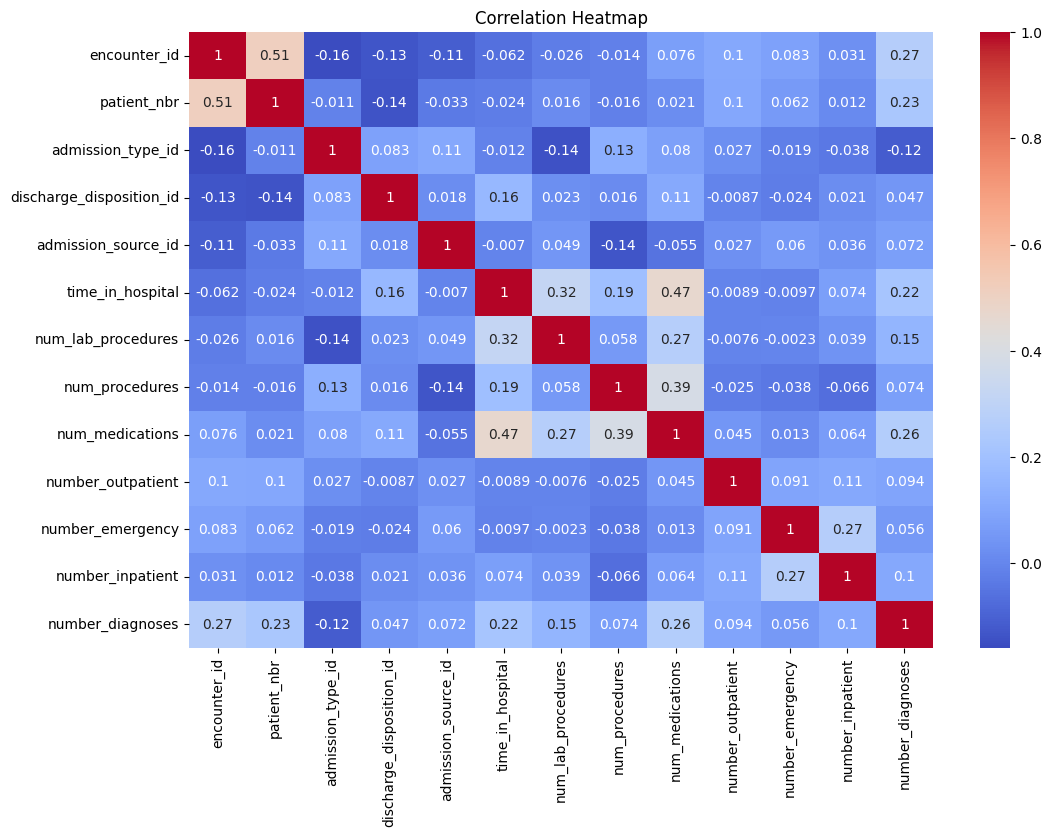

In [22]:
# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show();

<h1> Analytical Questions </h1>

<h2> a. Questions solved using functions you define (such as lambda-map functions): </h2>

<h3> 1. Create a function that calculates the average number of outpatient visits for patients with a specific diagnosis ('diag_1', 'diag_2', or 'diag_3').
</h3>

In [88]:
def average_outpatient_visits_by_diagnosis(data, diagnosis_code):
    # Filter the data to include only rows with the specific diagnosis code in any of the 'diag_1', 'diag_2', or 'diag_3' columns
    filtered_data = data[(data['diag_1'] == diagnosis_code) | (data['diag_2'] == diagnosis_code) | (data['diag_3'] == diagnosis_code)]
    
    # Calculate the total number of outpatient visits for patients with the specific diagnosis
    total_outpatient_visits = filtered_data['number_outpatient'].sum()
    
    # Calculate the total number of patients with the specific diagnosis
    total_patients_with_diagnosis = len(filtered_data)
    
    # Calculate the average number of outpatient visits for patients with the specific diagnosis
    average_outpatient_visits = total_outpatient_visits / total_patients_with_diagnosis
    
    return average_outpatient_visits

diag_code = '428'
avg_outpatient_visits = average_outpatient_visits_by_diagnosis(data_df, diag_code)
print(f"The average number of outpatient visits for patients with diagnosis_code {diag_code} is {avg_outpatient_visits:.2f}")

The average number of outpatient visits for patients with diagnosis_code 428 is 0.44


<h3>2. Write a function to calculate the average number of outpatients of male and female patients separately</h3>

In [89]:
def average_age_by_gender(data):
  
    # Group the data by 'gender' and calculate the mean of the 'age' column for each group
    grouped_data = round(data.groupby('gender')['number_outpatient'].mean(),2)
    
    # Convert the grouped data to a dictionary for easy access to average age by gender
    average_age_by_gender = grouped_data.to_dict()
    
    return average_age_by_gender

print("The average number of outpatients of male and females")
avg_age_by_gender = average_age_by_gender(data_df)
print(avg_age_by_gender)

The average number of outpatients of male and females
{'Female': 0.38, 'Male': 0.35, 'Unknown/Invalid': 0.0}


<h3> 3. Create a function to identify patients who had a specific medication combination, such as 'rosiglitazone' and 'acarbose'.
</h3>

In [111]:
def find_patients_with_medication_combination(data, medication1, medication2):
 
    # Filter the data to include only rows where both medications are present
    patients_with_combination = data[(data[medication1] == 'Steady') & (data[medication2] == 'Steady')]
    
    return patients_with_combination

med1='rosiglitazone'
med2='acarbose'
medication_combination = find_patients_with_medication_combination(data_df, med1, med2)
print(f"\nPatients with the specific combination of {med1} and {med2} are:\n")
medication_combination.head(5)


Patients with the specific combination of rosiglitazone and acarbose are:



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,medication_category
4921,26722938,97414263,Caucasian,Female,[70-80),1,1,7,3,Family/GeneralPractice,55,0,16,0,0,0,486,250,729,6,None,>8,Steady,No,No,No,No,No,Steady,No,No,No,Steady,Steady,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,low
7659,35904786,112309047,Caucasian,Female,[40-50),3,1,1,4,Surgery-General,31,2,19,0,0,0,552,250,NaN,2,None,None,No,No,No,No,No,No,No,No,No,No,Steady,Steady,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30,Elective,low
7829,36352068,56482542,Caucasian,Female,[60-70),2,1,2,1,NaN,44,4,16,1,0,1,440,496,414,7,None,None,No,No,No,No,No,No,No,No,No,No,Steady,Steady,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Urgent,low
9657,41767032,8794098,Caucasian,Female,[80-90),1,18,7,4,NaN,49,0,11,0,0,0,410,425,496,9,None,None,No,No,No,No,No,No,No,Steady,No,No,Steady,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,>30,Emergency,low
11858,48767220,4143807,Caucasian,Female,[40-50),1,18,7,9,NaN,70,0,22,0,0,0,250.93,70,599,8,None,>8,Steady,No,No,No,No,No,No,Steady,No,Steady,Steady,Steady,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO,Emergency,low


<h3> 4. Design a function to calculate the percentage of patients who were readmitted within 30 days of their previous hospitalization.</h3>

In [91]:
def percentage_readmitted_within_30_days(data):
    
    # Filter the data to include only patients who were readmitted within 30 days
    readmitted_within_30_days = data[data['readmitted'] == '<30']
    
    # Calculate the total number of patients readmitted within 30 days
    total_readmitted_within_30_days = len(readmitted_within_30_days)
    
    # Calculate the total number of patients in the dataset
    total_patients = len(data)
    
    # Calculate the percentage of patients readmitted within 30 days
    percentage_readmitted = (total_readmitted_within_30_days / total_patients) * 100
    
    return percentage_readmitted

percentage_readmitted = percentage_readmitted_within_30_days(data_df)
print(f"The percentage of patients who were readmitted within 30 days of their previous hospitalization: {percentage_readmitted:.2f}%")

The percentage of patients who were readmitted within 30 days of their previous hospitalization: 11.16%


<h3> 5. Create a function that calculates the average number of lab procedures per patient using the 'num_lab_procedures' column.</h3>

In [74]:
def average_lab_procedures_per_patient(data):
     
    # Calculate the total number of lab procedures for all patients
    total_lab_procedures = data['num_lab_procedures'].sum()
    
    # Calculate the total number of patients
    total_patients = len(data)
    
    # Calculate the average number of lab procedures per patient
    average_lab_procedures = total_lab_procedures / total_patients
    
    return average_lab_procedures

avg_lab_procedures = average_lab_procedures_per_patient(data_df)
print(f"Average number of lab procedures per patient is {avg_lab_procedures:.2f}")

Average number of lab procedures per patient is 43.10


<h2> b. Questions utilizing Pandas and NumPy</h2>

<h3> 6. Find the median length of stay for diabetic patients. </h3>

In [23]:
print(
    f"The median length of stay for diabetic patients are {np.median(data_df['time_in_hospital'])} days")

The median length of stay for diabetic patients are 4.0 days


<h3> 7. Calculate the percentage of male and female patients in the dataset. </h3>

In [24]:
gender_counts = data_df['gender'].value_counts()

In [25]:
total_patients = len(data_df)

In [26]:
male_patients = (gender_counts['Male'] / total_patients) * 100

In [27]:
female_patients = (gender_counts['Female'] / total_patients) * 100

In [28]:
print(f"The percentage of Male patients: {male_patients: .2f} %")
print(f"The percentage of Female patients: {female_patients: .2f} %")

The percentage of Male patients:  46.24 %
The percentage of Female patients:  53.76 %


<h3> 8. Determine the most common race/ethnicity among diabetic patients </h3>

In [29]:
print(f"The most common race/enthnicity among diabetic patients is {data_df['race'].value_counts().idxmax()} with \
the number of patients being : {data_df['race'].value_counts()[0]}")

The most common race/enthnicity among diabetic patients is Caucasian with the number of patients being : 76099


<h3> 9. Create a new column that categorizes patients based on the number of medications they are taking.</h3>
For example, create categories like 'Low', 'Medium', and 'High' based on the 'num_medications' column.

In [30]:
min_meds = data_df['num_medications'].min()
print("The minimum number of medications a patient has:",min_meds)

The minimum number of medications a patient has: 1


In [31]:
max_meds = data_df['num_medications'].max()
print("The maximum number of medications a patient has:", max_meds)

The maximum number of medications a patient has: 81


In [32]:
print(f"The range of number of medications a patient could have is between {min_meds} and {max_meds}")

The range of number of medications a patient could have is between 1 and 81


In [33]:
num_bins = 3
# Calculate bin width
bin_width = (max_meds - min_meds) // 3

# Create the bins based on the minimum, maximum, and width of each bin
bins = [min_meds-1 + i * bin_width for i in range(num_bins)]
bins.append(max_meds)

In [34]:
bins

[0, 26, 52, 81]

In [35]:
# Create the column and assign the labels to the bins
data_df['medication_category'] =  pd.cut(x = data_df['num_medications'], bins = bins, labels= ['low', 'medium', 'high'])

In [36]:
data_df[['num_medications', 'medication_category']]

,num_medications,medication_category
0,1,low
1,18,low
2,13,low
3,16,low
4,8,low
...,...,...
101761,16,low
101762,18,low
101763,9,low
101764,21,low


<h3> 10. Find the average number of lab procedures for patients who underwent surgery and those who didn't</h3>

In [37]:
# Patients who had surgeries done
patients_with_surgeries = data_df[data_df['num_procedures'] > 0]

In [38]:
# Patients who didn't get any surgeries
patients_without_surgeries = data_df[data_df['num_procedures'] == 0]

In [39]:
print(f"The average number of lab procedures for patients who underwent surgery is \
{patients_with_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who underwent surgery is 43.24


In [40]:
print(f"The average number of lab procedures for patients who didn't have surgery is \
{patients_without_surgeries['num_lab_procedures'].mean():.2f}")

The average number of lab procedures for patients who didn't have surgery is 42.93


<h2> c. Questions with visualizations using Matplotlib and Seaborn </h2>

<h3> 11. Visualize the distribution of age groups using a pie chart </h3>

In [41]:
age_dist = data_df['age'].value_counts()
age_dist

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

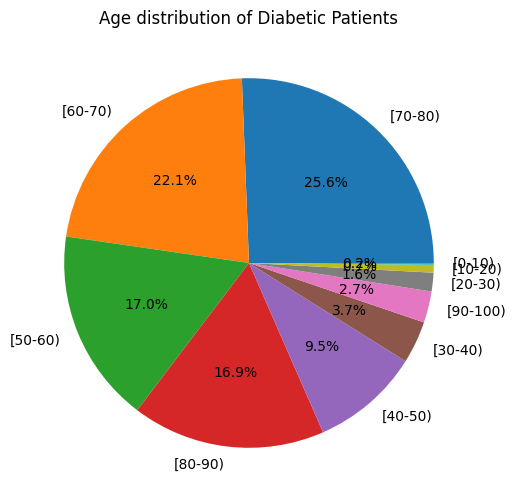

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(age_dist, labels = age_dist.index,autopct='%1.1f%%');
ax.set_title("Age distribution of Diabetic Patients");

<h3> 12. Create a bar plot to show the count of patients in each age group</h3>

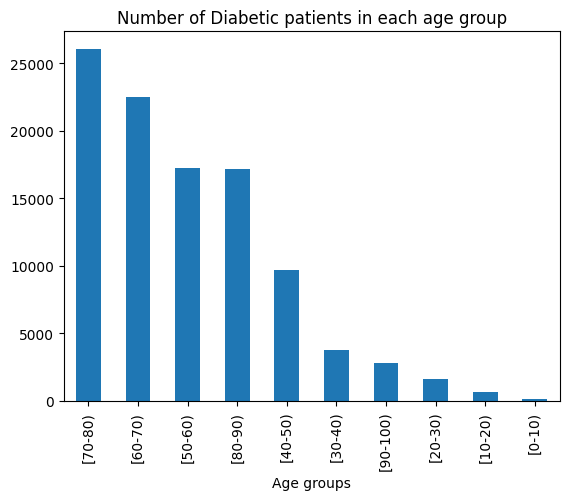

In [43]:
age_dist.plot(kind='bar')
plt.xlabel("Age groups")
plt.title("Number of Diabetic patients in each age group");

<h3>13. Compare the time spent in the hospital for different admission types </h3>

In [44]:
data_df.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,medication_category
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NaN,low
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,low
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,low
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,low
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,low


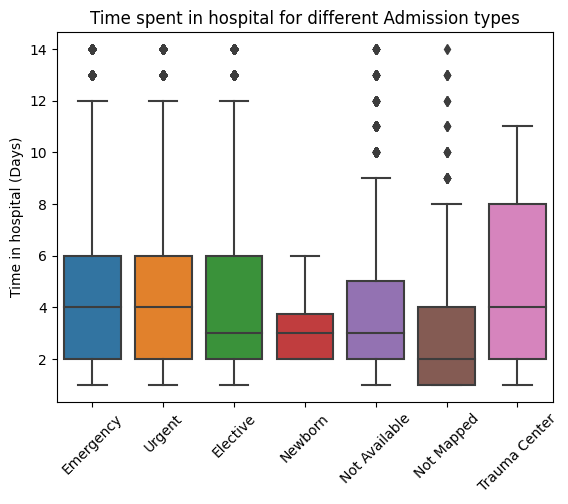

In [53]:
sns.boxplot(data_df, x='description', y='time_in_hospital')
plt.title("Time spent in hospital for different Admission types")
plt.ylabel("Time in hospital (Days)")
plt.xlabel("")
plt.xticks(rotation=45);

<h3> 14. Compare the length of stay for different races</h3>

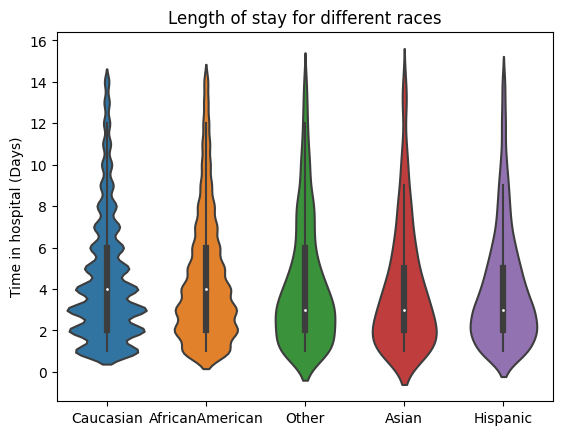

In [58]:
sns.violinplot(data=data_df, x="race", y="time_in_hospital")
plt.title("Length of stay for different races")
plt.xlabel("")
plt.ylabel("Time in hospital (Days)");

<h3> 15. Create a histogram to visualize the distribution of the number of diagnoses per patient</h3>

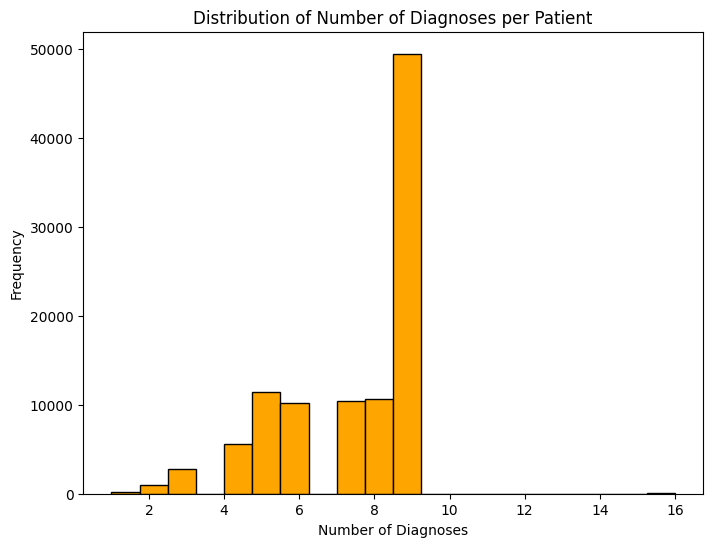

In [71]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(data_df['number_diagnoses'], bins=20, color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Diagnoses per Patient');

<h2>d. Questions revealing valuable insights from the dataset</h2>

<h3> 19. Determine the most common medical specialty for patients who had a length of stay greater than the median length of stay. </h3>

In [115]:
# Calculate the median length of stay
median_length_of_stay = data_df['time_in_hospital'].median()

# Filter the data to include only patients with a length of stay greater than the median
long_stay_patients = data_df[data_df['time_in_hospital'] > median_length_of_stay]

# Determine the most common medical specialty for these patients
most_common_specialty = long_stay_patients['medical_specialty'].mode().values[0]

print(f"The most common medical specialty for patients who
most_common_specialty

'InternalMedicine'